In [125]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  

df=pd.read_csv('MRec.csv')
df=df[['Age','Gender','Mood','Genre']]
df.head()

,Age,Gender,Mood,Genre
0,18,F,Happy,Rock
1,18,F,Gloomy,Instrumental
2,18,F,Stressed,Pop
3,18,F,Relaxing,Pop
4,18,F,Energetic,Hiphop


In [130]:
print(df.nunique())
df.describe()


Age       22
Gender     2
Mood       5
Genre      8
dtype: int64


,Age
count,305.000000
mean,27.442623
std,7.557944
min,18.000000
25%,22.000000
50%,24.000000
75%,32.000000
max,55.000000


Age       22
Gender     2
Mood       5
Genre      8
dtype: int64

In [119]:
#Replacing categorical data with integer values

df['Gender'].replace(['M','F'],[0,1], inplace=True)
df['Mood'].replace(['Happy','Gloomy','Stressed','Relaxing','Energetic'],[1,2,3,4,5], inplace=True)
df.head(7)


,Age,Gender,Mood,Genre,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,18,1,1,Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,1,2,Instrumental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,1,3,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,1,4,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,1,5,Hiphop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19,0,1,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19,0,2,EDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [104]:
#Checking for null values to fill
null_sum=df.isnull().sum()
null_sum

data_shape=df.shape
data_shape
df.describe

<bound method NDFrame.describe of      Age Gender       Mood         Genre  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0     18      F      Happy          Rock         NaN         NaN         NaN   
1     18      F     Gloomy  Instrumental         NaN         NaN         NaN   
2     18      F   Stressed           Pop         NaN         NaN         NaN   
3     18      F   Relaxing           Pop         NaN         NaN         NaN   
4     18      F  Energetic        Hiphop         NaN         NaN         NaN   
..   ...    ...        ...           ...         ...         ...         ...   
300   55      F      Happy          Rock         NaN         NaN         NaN   
301   55      F     Gloomy         Blues         NaN         NaN         NaN   
302   55      F   Stressed          Rock         NaN         NaN         NaN   
303   55      F   Relaxing  Instrumental         NaN         NaN         NaN   
304   55      F  Energetic        Hiphop         NaN         NaN         NaN   

     

In [112]:
#Mean, Variance, Std-deviation
print("Mean of age with outliers:")
print(np.mean(np.append(df["Age"],50)));
print("nStd-dev of age:");
print(np.std(df["Age"]))

#Median
print("Median of age:")
print(np.median(df["Age"]))

print("nQuantiles:")
print(np.percentile(df["Age"],np.arange(0, 100, 25)))

Mean of age with outliers:
27.516339869281047
nStd-dev of age:
7.54554388128459
Median of age:
24.0
nQuantiles:
[18. 22. 24. 32.]


In [106]:
indp= df.iloc[:,:-1].values 
dpn= df.iloc[:,3].values

#handling missing data (Replacing missing data with the mean value)  
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

#Fitting imputer object to the independent variables.   
imputerimputer= imputer.fit(indp[:, 1:3])  

#Replacing missing data with the calculated mean value  
indp[:, 1:3]= imputer.transform(indp[:, 1:3]) 

df.head(7)

,Age,Gender,Mood,Genre,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,18,1,1,Rock,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,1,2,Instrumental,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,1,3,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,1,4,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,1,5,Hiphop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19,0,1,Pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,19,0,2,EDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
#Model testing
X=df[['Age','Gender','Mood']]
y=df['Genre']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions=model.predict([ [21,0,4],[21,1,1],[24,0,1],[31,0,4],[22,0,5] ])
predictions

array(['Indie/Acoustic', 'Indie/Acoustic', 'Indie/Acoustic', 'Pop',
       'Rock'], dtype=object)

Text(0.5, 1.0, 'Count of demographics in dataset:')

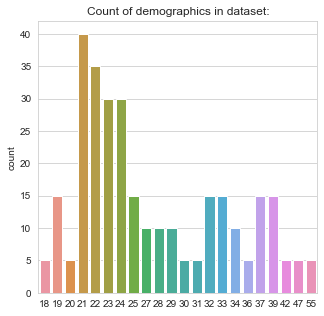

In [97]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df.Age.values, data=df)
ax.set_title("Count of demographics in dataset:")

<AxesSubplot:xlabel='Age', ylabel='Genre'>

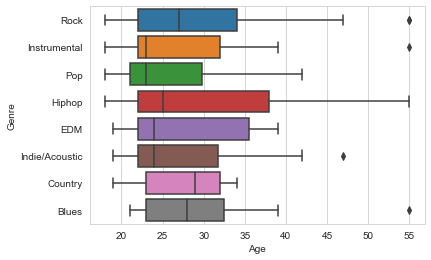

In [98]:
sns.boxplot(x='Age',y='Genre',data=df)

<AxesSubplot:xlabel='Mood', ylabel='Genre'>

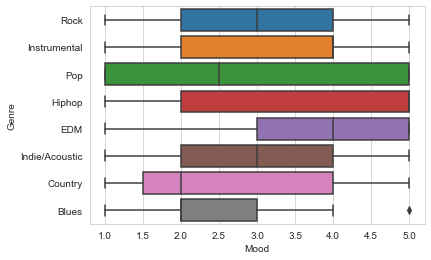

In [99]:
sns.boxplot(x='Mood',y='Genre',data=df)

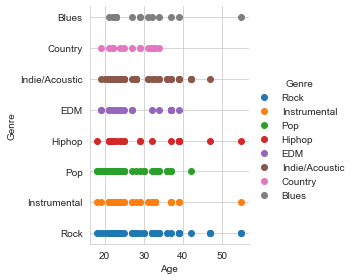

In [100]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Genre", height=4).map(plt.scatter, "Age", "Genre").add_legend();
plt.show();

In [101]:
#Outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
#print(df['Age'].quantile(0.5))
print(
    (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))
)
#df['Age'].describe()

       Age  Gender  Genre   Mood  Unnamed: 10  Unnamed: 4  Unnamed: 5  \
0    False   False  False  False        False       False       False   
1    False   False  False  False        False       False       False   
2    False   False  False  False        False       False       False   
3    False   False  False  False        False       False       False   
4    False   False  False  False        False       False       False   
..     ...     ...    ...    ...          ...         ...         ...   
300   True   False  False  False        False       False       False   
301   True   False  False  False        False       False       False   
302   True   False  False  False        False       False       False   
303   True   False  False  False        False       False       False   
304   True   False  False  False        False       False       False   

     Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  
0         False       False       False       False  
1         False

C:\Users\User\AppData\Local\Temp\ipykernel_5628\1504799766.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))


In [41]:
#Feature-scaling
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)
